In [1]:
pip install pandas textblob


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = r'C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\sentiment analysis.csv'
df = pd.read_csv(file_path)

df


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [17]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


Doing Sample

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [3]:
try:
    # Check if stopwords and wordnet resources are already downloaded
    stopwords.words('english')
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    # If resources are missing, download them
    nltk.download('stopwords')
    nltk.download('wordnet')


In [5]:
# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [7]:
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Lemmatize and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text


In [9]:
sample_review = "This product is amazing! I absolutely love it."
processed_review = preprocess_text(sample_review)
print(processed_review)


product amazing absolutely love


In [13]:
import nltk

# Download necessary resources (run only once)
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    nltk.download('stopwords')
    nltk.download('wordnet')


In [93]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove 'readmore' or similar unwanted text at the end of the review
    text = re.sub(r'(?i)\.READ MORE$', '', text)  # Remove 'readmore' at the end of the string (case-insensitive)
    
    # Remove non-alphabetic characters (optional if you don't want any other unwanted characters)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Lemmatize and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

# Load your dataset (replace with your actual file path)
file_path = r'C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\sentiment analysis.csv'
dataFrame = pd.read_csv(file_path)

# Apply preprocessing to the 'review' column
dataFrame['processed_review'] = dataFrame['review'].apply(preprocess_text)

# Verify the changes: check original and processed reviews
print(dataFrame[['review', 'processed_review']].head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                   It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.R

sentiment_category
Positive    7341
Neutral     2038
Negative     597
Name: count, dtype: int64


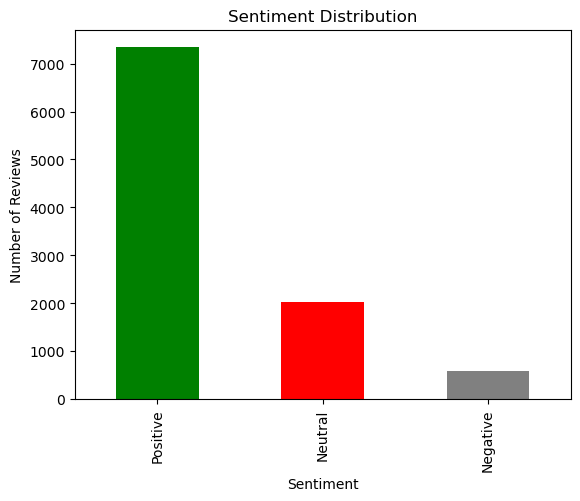

In [97]:
# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()
print(sentiment_counts)

# Optional: Plot the sentiment distribution using matplotlib
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                   It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.R

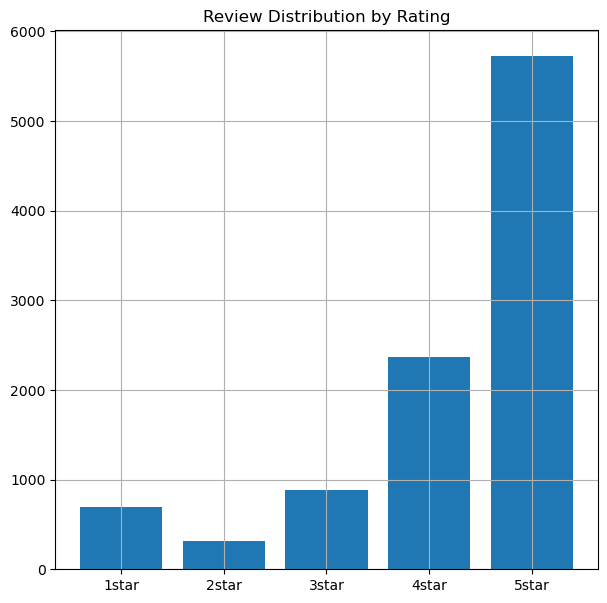

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords

# Load the dataset (make sure this file path is correct)
file_path = r'C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\sentiment analysis.csv'
dataFrame = pd.read_csv(file_path)

# Check if 'dataFrame' is loaded correctly by displaying the first few rows
print(dataFrame.head())

# Download stopwords for WordCloud (if not already downloaded)
stopwords = set(stopwords.words('english'))

# Plotting Bar Graph for Rating Distribution
plt.figure(figsize=(7, 7))
ratings = ['1star', '2star', '3star', '4star', '5star']
numRatings = [len(dataFrame[dataFrame['rating'] == 1]),
              len(dataFrame[dataFrame['rating'] == 2]),
              len(dataFrame[dataFrame['rating'] == 3]),
              len(dataFrame[dataFrame['rating'] == 4]),
              len(dataFrame[dataFrame['rating'] == 5])]
plt.title('Review Distribution by Rating')
plt.grid(True)
plt.bar(ratings, numRatings)
plt.show()





Generating Word Cloud for 1 Star Reviews...


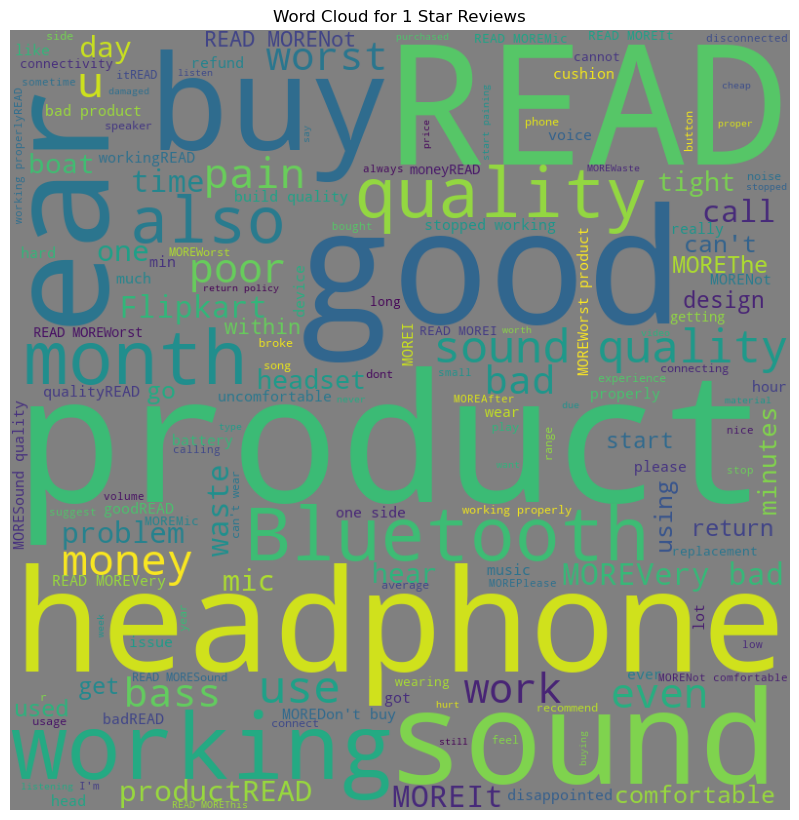

Generating Word Cloud for 2 Star Reviews...


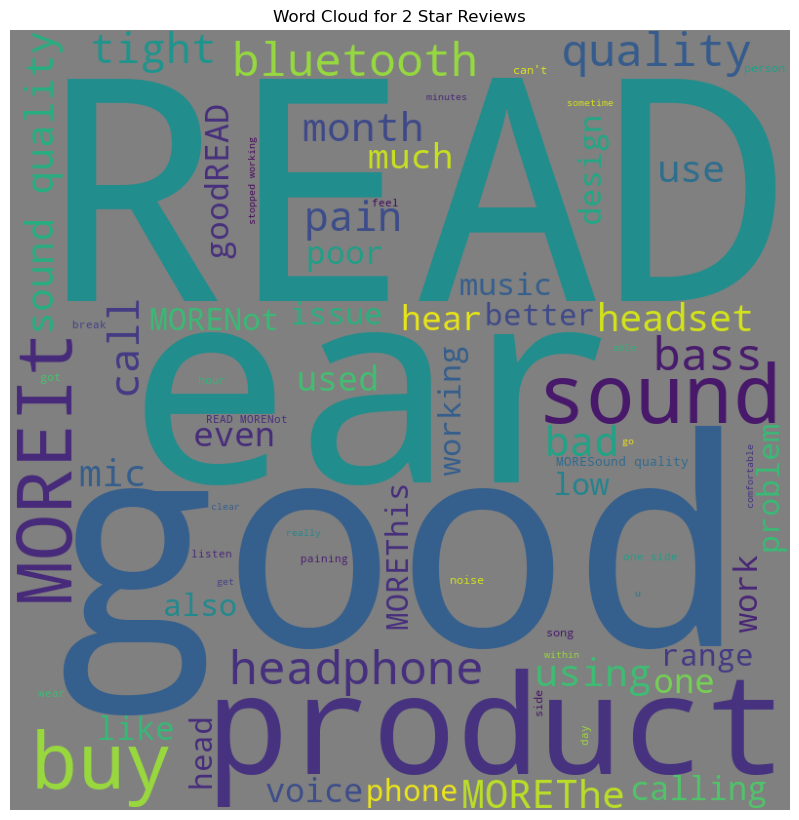

Generating Word Cloud for 3 Star Reviews...


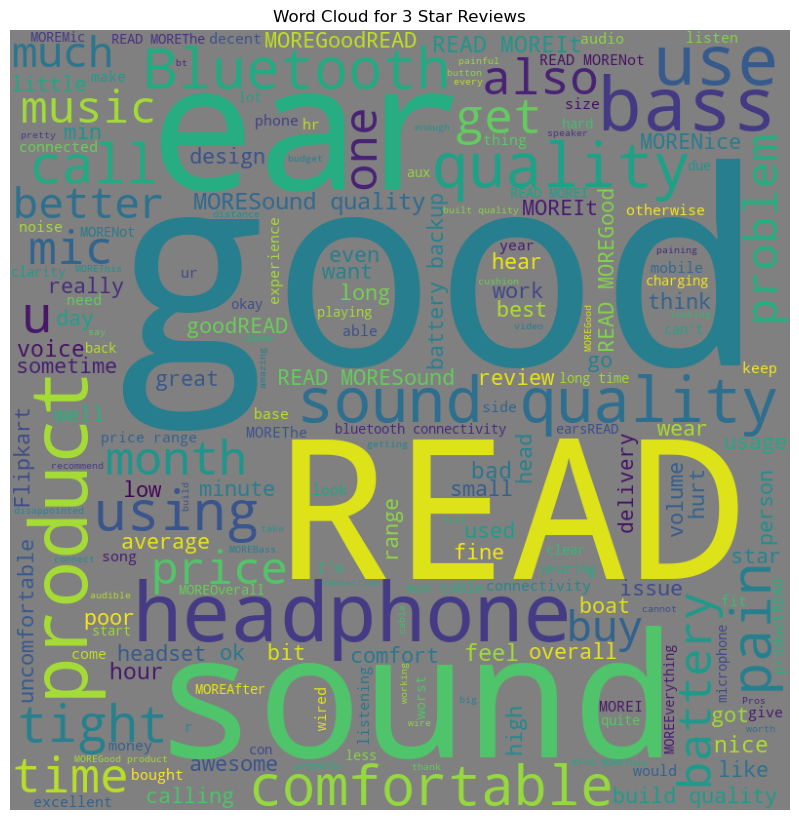

Generating Word Cloud for 4 Star Reviews...


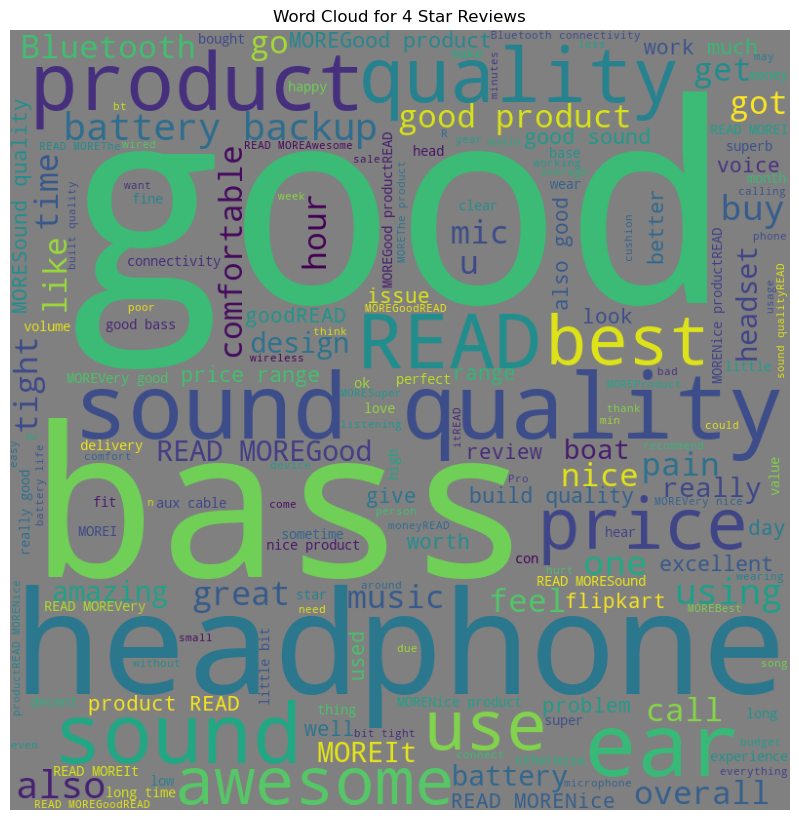

Generating Word Cloud for 5 Star Reviews...


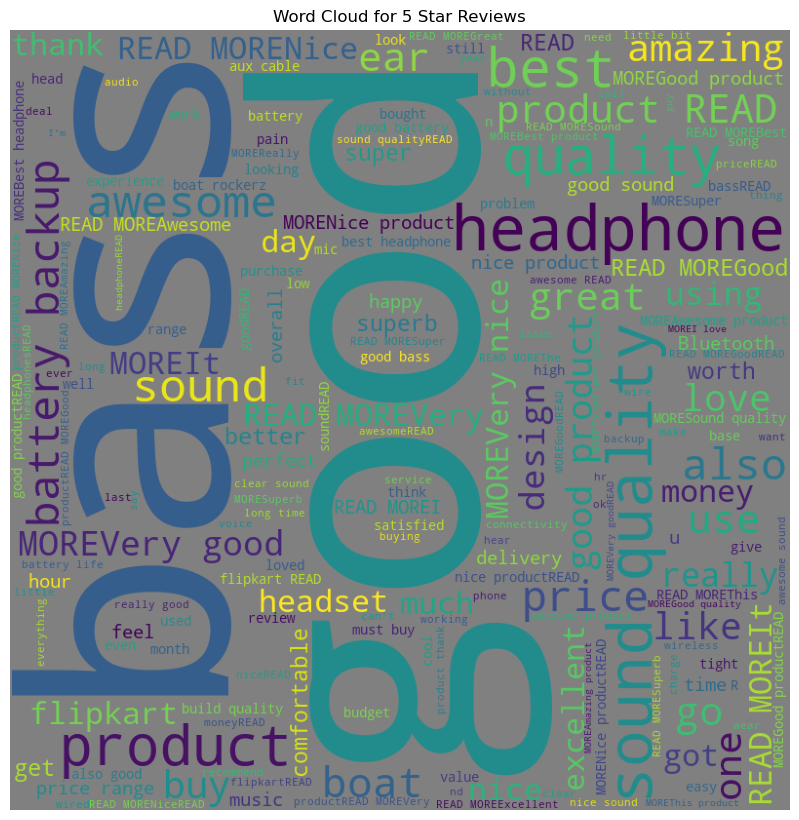

In [103]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Function to Generate Word Cloud for Reviews of Specific Rating
def WordCloudForRating(dataFrame, rating):
    # Filter reviews for the specified rating
    df = dataFrame[dataFrame['rating'] == rating]['review']
    corpus = ''
    
    for review in df:
        corpus += review
    
    # Clean corpus to remove 'readmore' and other unwanted words
    corpus = re.sub(r'(?i)readmore', '', corpus)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='grey',
                          stopwords=stopwords, min_font_size=10).generate(corpus)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Word Cloud for {rating} Star Reviews')
    plt.tight_layout(pad=0)
    plt.show()

# Generate Word Clouds for Each Rating (1 to 5 stars)
for i in range(1, 6):
    print(f"Generating Word Cloud for {i} Star Reviews...")
    WordCloudForRating(dataFrame, i)  # Generate word cloud for each rating


In [107]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Function to Count Word Frequency for Reviews of Specific Rating
def WordFrequencyForRating(dataFrame, rating):
    # Filter reviews for the specified rating
    df = dataFrame[dataFrame['rating'] == rating]['review']
    corpus = ''
    
    for review in df:
        corpus += review
    
    # Clean corpus to remove 'readmore' and other unwanted words
    corpus = re.sub(r'(?i)readmore', '', corpus)
    
    # Generate Word Frequency (Word Count)
    words = corpus.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    word_counts = Counter(filtered_words)
    
    # Display word frequency for the rating
    print(f"Word Frequency for {rating} Star Reviews:")
    for word, count in word_counts.most_common(10):  # Show top 10 most common words
        print(f"{word}: {count}")

# Generate Word Frequency for Each Rating (1 to 5 stars)
for i in range(1, 6):
    print(f"\nGenerating Word Frequency for {i} Star Reviews...\n")
    WordFrequencyForRating(dataFrame, i)  # Generate word frequency for each rating



Generating Word Frequency for 1 Star Reviews...

Word Frequency for 1 Star Reviews:
product: 133
quality: 115
sound: 100
good: 95
buy: 95
working: 89
bad: 77
MOREVery: 51
one: 43
also: 42

Generating Word Frequency for 2 Star Reviews...

Word Frequency for 2 Star Reviews:
good: 62
quality: 56
sound: 38
product: 37
MORENot: 29
ear: 26
ears: 25
one: 24
using: 21
buy: 20

Generating Word Frequency for 3 Star Reviews...

Word Frequency for 3 Star Reviews:
good: 334
quality: 235
sound: 182
product: 109
use: 100
bass: 86
ear: 86
using: 63
battery: 62
ears: 62

Generating Word Frequency for 4 Star Reviews...

Word Frequency for 4 Star Reviews:
good: 910
quality: 605
sound: 583
product: 466
bass: 323
MOREGood: 227
battery: 212
price: 211
productREAD: 194
also: 188

Generating Word Frequency for 5 Star Reviews...

Word Frequency for 5 Star Reviews:
good: 1431
product: 1186
quality: 1077
sound: 1008
bass: 702
productREAD: 519
best: 482
MOREVery: 431
battery: 425
nice: 424


In [116]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\divaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [118]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(review):
    sentiment = sid.polarity_scores(review)
    return sentiment['compound']  # Compound score indicates overall sentiment

# Apply sentiment score calculation
dataFrame['sentiment_score'] = dataFrame['review'].apply(get_sentiment_score)

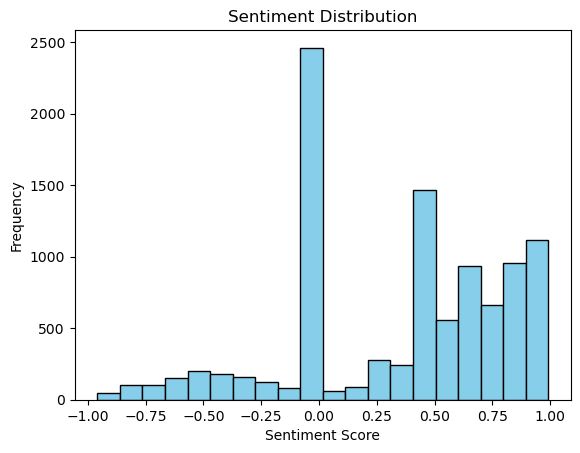

In [120]:
plt.hist(dataFrame['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [123]:
correlation = dataFrame[['rating', 'sentiment_score']].corr()
print(correlation)


                   rating  sentiment_score
rating           1.000000         0.485495
sentiment_score  0.485495         1.000000


Correlation Coefficient: The values range from -1 to 1, where:
1 means a perfect positive correlation
-1 means a perfect negative correlation
0 means no correlation

rating and sentiment_score correlation: The correlation coefficient between rating and sentiment_score is 0.485495. This is a moderate positive correlation, indicating that as the sentiment score increases (indicating more positive sentiment), the rating tends to increase as well.

In [146]:
ratings1 = dataFrame[dataFrame['rating'] == 1]
ratings2 = dataFrame[dataFrame['rating'] == 2]
ratings3 = dataFrame[dataFrame['rating'] == 3]
ratings4 = dataFrame[dataFrame['rating'] == 4]
ratings5 = dataFrame[dataFrame['rating'] == 5]

 
print(ratings1['sentiment_score'].mean())
print(ratings2['sentiment_score'].mean())
print(ratings3['sentiment_score'].mean())
print(ratings4['sentiment_score'].mean())
print(ratings5['sentiment_score'].mean())


-0.26287409551374824
-0.11717387096774191
0.08178868778280544
0.3874388583509514
0.48299877750611253


In [148]:
# Analyze sentiment differences
print("Sentiment for low ratings (1-star):")
print(low_ratings['sentiment_score'].mean())

print("Sentiment for high ratings (5-star):")
print(high_ratings['sentiment_score'].mean())



Sentiment for low ratings (1-star):
-0.26287409551374824
Sentiment for high ratings (5-star):
0.48299877750611253
